Guiding Question:
With what level of accuracy can we predict if a photo is taken of Buildings, a Forest, a Glacier, a Mountain, the Sea, or a Street?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import xgboost as xgb

In [4]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.svm import LinearSVC, SVC
from sklearn import datasets

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

In [5]:

from PIL import Image
import numpy as np
#import keras
#from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import os
from cv2 import cv2
import matplotlib.pyplot as plt
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.layers.core import Activation

In [6]:
# The training data set is in the /Users/macos/Documents/Intel Image Classification/seg_train
trn_img_path = "archive/seg_train/seg_train/"
# The testing data set is in the /Users/macos/Documents/Intel Image Classification/seg_test
tst_img_path = "archive/seg_test/seg_test/"
# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train =[] # Stores the training image hog data
label_train = [] # Stores the training image label
X_test = [] # Stores the testing image hog data
label_test = [] # Stores the testing image label
scene_label=['Buildings','Forest', 'Glacier','Mountain','Sea','Street']

Setting X_test/train as an empty array that will eventually take the images from trn/tst_img_path along with labels for each.

Labels are as follows:

0 = Buildings

1 = Forest

2 = Glacier

3 = Mountain

4 = Sea

5 = Street

In [7]:
def hog_data_extractor(jpeg_path):
    jpeg_data = cv2.imread(jpeg_path)
    jpeg_data=cv2.resize(jpeg_data,(100,100)) 
    hog_data = feature.hog(jpeg_data)/255.0
    return hog_data


Histograms of gradients is used as a feature description. With image processing, model predictions works by assessing the image by the intensity of the gradients and direction.

In [8]:
def jpeg_to_array (scene_type, img_root_path,data_type):
    scene_path = os.path.join(img_root_path,scene_type.lower())
    print('Loading ' + data_type +' images for scene type '+scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Training'):
                X_train.append(hog_data_extractor(img_path))
                label_train.append(str(scene_type))
            if(data_type =='Testing'):
                X_test.append(hog_data_extractor(img_path))
                label_test.append(np.array(str(scene_type)))

Takes the images from each dataset and applies a label for each set, along with appending our data to 'Training' and 'Testing'.

In [9]:
[jpeg_to_array(scene,trn_img_path,'Training')for scene in scene_label]
len(X_train)
[jpeg_to_array(scene,tst_img_path,'Testing')for scene in scene_label]
len(X_test)

Loading Training images for scene type Buildings
Loading Training images for scene type Forest
Loading Training images for scene type Glacier
Loading Training images for scene type Mountain
Loading Training images for scene type Sea
Loading Training images for scene type Street
Loading Testing images for scene type Buildings
Loading Testing images for scene type Forest
Loading Testing images for scene type Glacier
Loading Testing images for scene type Mountain
Loading Testing images for scene type Sea
Loading Testing images for scene type Street


3000

Takes our jpeg images in train and test and creates an array for each.

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(label_train)
y_test = le.fit_transform(label_test)


Transforming our labels into values that is interperable to our models

Linear SVC Model:

In [11]:
lsvc = LinearSVC(random_state=42, tol=1e-6)
lsvc.fit(X_train,y_train)
print('Coef',lsvc.coef_)
print('Intercept',lsvc.intercept_)
lsvc.score(X_train, y_train), lsvc.score(X_test, y_test)

Coef [[-0.3627344  -0.08747338  0.07841048 ... -0.53401883 -0.25389972
   0.4861312 ]
 [ 1.26073888  0.83338363  0.39824314 ...  0.27000713  0.38715591
   0.2281437 ]
 [-0.6438889  -0.21655267 -0.02230639 ... -0.11923578 -0.1811426
  -0.30823612]
 [-0.49158152 -0.21101896 -0.04698341 ...  0.20054332  0.19431871
   0.03302775]
 [-0.28144218 -0.05630377  0.03655895 ...  0.02454707 -0.0756752
  -0.1719453 ]
 [ 0.5089825  -0.25868832 -0.42968394 ...  0.16897856 -0.06822714
  -0.27956518]]
Intercept [-0.43461477 -1.08844978 -0.73290002 -0.65995503 -0.6306782  -0.51250122]


(0.6014678637594414, 0.602)

In [12]:
#pgrid = {"C": np.linspace(0.0001, 2, 10)}

In [13]:
lsvc = LinearSVC(verbose=0, C = 2, random_state = 42)

In [14]:
lsvc.fit(X_train, y_train);

ACCURACY SCORE OF 62.6% ON UNSEEEN DATA:

In [15]:
lsvc.score(X_train, y_train), lsvc.score(X_test, y_test)

(0.6314664386489953, 0.6263333333333333)

XG Boost Model Below(did not run because of a large fit time):

In [16]:
from xgboost import XGBClassifier

In [17]:
xgb = XGBClassifier()


In [18]:
#X_train.shape

In [19]:
#X_train_array = np.array(X_train)
#y_train_array = np.array(y_train)

In [20]:
#xgb.fit(X_train_array, y_train_array);

In [21]:
#xgb.score(X_train, y_train), xgb.score(X_test, y_test)

NULL MODEL VALUES VISUALIZED AND COUNTED:

In [23]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2191]
 [   1 2271]
 [   2 2404]
 [   3 2512]
 [   4 2274]
 [   5 2382]]


In [27]:
my_dict = dict({ 0: 2191, 1: 2271, 2: 2404, 3: 2512, 4: 2274, 5: 2382})

In [51]:
value_counts_df = pd.DataFrame(my_dict.items())
for i in value_counts_df[0]:
    if i == 0:
        value_counts_df.replace(0, "buildings", inplace= True)
    elif i == 1:
        value_counts_df.replace(1, "forest", inplace= True)
    elif i == 2:
        value_counts_df.replace(2, "glacier", inplace= True)
    elif i == 3:
        value_counts_df.replace(3, "mountain", inplace= True)
    elif i == 4:
        value_counts_df.replace(4, "sea", inplace= True)
    elif i == 5:
        value_counts_df.replace(5, "street", inplace= True)
value_counts_df

,0,1
0,buildings,2191
1,forest,2271
2,glacier,2404
3,mountain,2512
4,sea,2274
5,street,2382


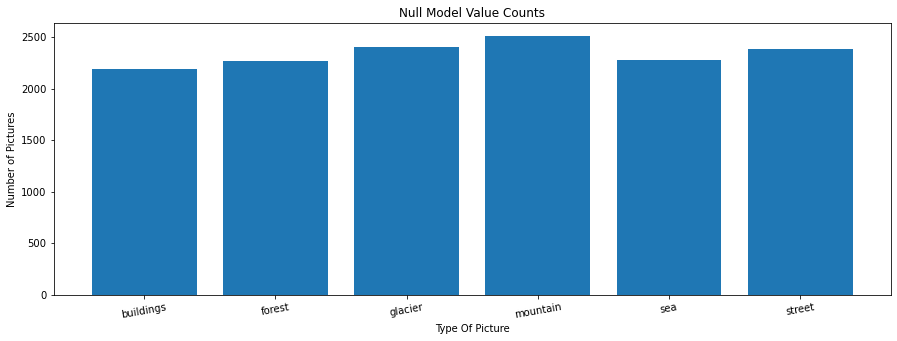

In [52]:
plt.figure(figsize = (15, 5))

# Bar chart
plt.bar(x = value_counts_df[0], height = value_counts_df[1])

# Create a descriptive title
plt.title('Null Model Value Counts')

# Add axis labels
plt.xlabel('Type Of Picture')
plt.ylabel('Number of Pictures')

# Rotate text
plt.xticks(rotation = 10); # semicolon suppresses text output

PREDICTIONS PRINT OUT CHART FROM LSVC MODEL:

In [108]:
preds_lsvc = lsvc.predict(X_test)
preds_zip = list(zip (preds_lsvc, y_test))
#preds_zip

In [107]:
preds_df = pd.DataFrame(preds_zip)
preds_df.T


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,2,0,0,0,0,5,0,1,0,...,5,5,5,5,5,5,0,5,5,1
1,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5


ATTEMPTED FIT FOR A GBOOST MODEL:

In [ ]:
#gb_params = {
    #'max_depth': [2],
    #'n_estimators': [125],
    #'learning_rate': [.12],
#}
#gb_gs = GridSearchCV(gboost, param_grid=gb_params, cv=1, n_jobs = -2, verbose = True)
#gb_gs.fit(X_train, y_train)
#print(gb_gs.best_score_)
#gb_gs.best_params_

In [114]:
gboost = GradientBoostingClassifier(verbose = True,max_depth = 2, n_estimators = 125, learning_rate = .12, random_state=42)

In [115]:
gboost.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.6986          269.17m
         2           1.6243          269.82m
         3           1.5589          283.29m
         4           1.5020          307.59m
         5           1.4542          304.55m
         6           1.4086          288.93m
         7           1.3695          277.25m
         8           1.3340          268.05m
         9           1.3014          260.75m
        10           1.2708          256.63m
        20           1.0694          231.33m
        30           0.9535          210.34m
        40           0.8748          186.80m
        50           0.8166          161.16m
        60           0.7715          137.91m
        70           0.7324          115.57m
        80           0.6988           94.98m
        90           0.6708           74.28m
       100           0.6456           52.78m


GradientBoostingClassifier(learning_rate=0.12, max_depth=2, n_estimators=125,
                           random_state=42, verbose=True)

In [116]:
gboost.score(X_train, y_train), gboost.score(X_test, y_test)

(0.827775402593701, 0.6956666666666667)

PRINT OUT OF PREDICTIONS WITH IMAGE SIDE BY SIDE:

In [117]:
def scene_predict(img_path):
    image = cv2.imread(img_path)
    ip_image = Image.open(img_path)
    image = cv2.resize(image,(30,30))
    prd_image_data = hog_data_extractor(img_path)
    scene_predicted = lsvc.predict(prd_image_data.reshape(1, -1))[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(ip_image)
    ax[0].set_title('input image')

    ax[1].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    ax[1].set_title('Scene predicted :'+ scene_label[scene_predicted]);

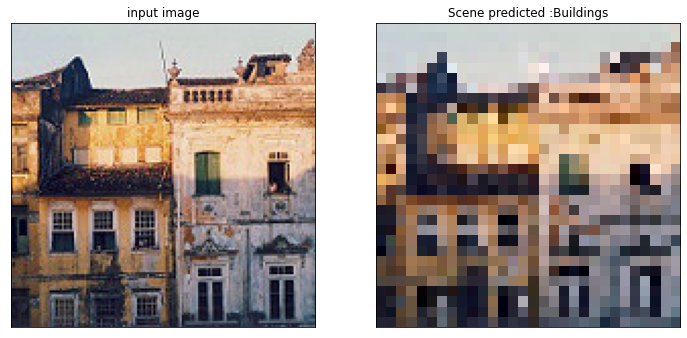

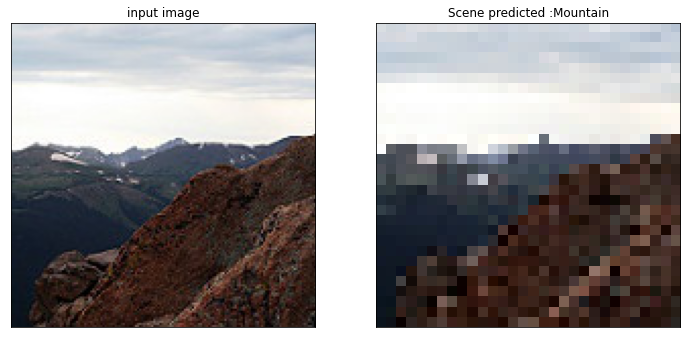

In [118]:
ip_img_folder = 'archive/seg_pred/seg_pred/'
ip_img_files = ['520.jpg', '420.jpg']
scene_predicted = [scene_predict(os.path.join(ip_img_folder,img_file))for img_file in ip_img_files]

Conclusion:
We were able to predict if a photo was taken of Buildings, a Forest, a Glacier, a Mountain, the Sea, or a Street with an accuracy of 69% on unseen data. 

CREDITS:
Our data EDA and structure was influenced and code blocks were taken from Arun Madhuk: https://www.kaggle.com/arunmadhuk/intel-image-classification-using-linear-svm